In [1]:
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_mfcc(file_name, pad_len=40, n_mfcc=15):
    """Function used to extract MFCCs from audio data.

    Computes MEL Coefficients for an audio file.

    Args:
        file_name (str): Path to the audio file along with extension.
        pad_len (int): Number of samples to use.
            Default: 40 (approx. 4 seconds)
        n_mfcc (int): Number of MEL coefficients to compute.

    Returns:
        mfccs (np.array): 1D array of shape (n_mfcc * pad_len,)
    """

    signal, sr = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)

    if mfccs.shape[1] > pad_len:
        mfccs = mfccs[:, :pad_len]
    else:
        pad_width = pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, ((0, 0), (0, pad_width)), mode='constant')

    return mfccs

In [3]:
def plot_wave_and_mfcc(path, category, pad_len=40, n_mfcc=15):
    signal, sr = librosa.load(path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)

    if mfccs.shape[1] > pad_len:
        mfccs = mfccs[:, :pad_len]
    else:
        pad_width = pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, ((0, 0), (0, pad_width)), mode='constant')

    fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
    librosa.display.waveshow(signal, sr=sr, ax=ax[0])
    librosa.display.specshow(mfccs, ax=ax[1], x_axis='time', y_axis='mel')

    plt.suptitle(category)
    plt.savefig(f'./readme_media/{category}.png')
    plt.show()

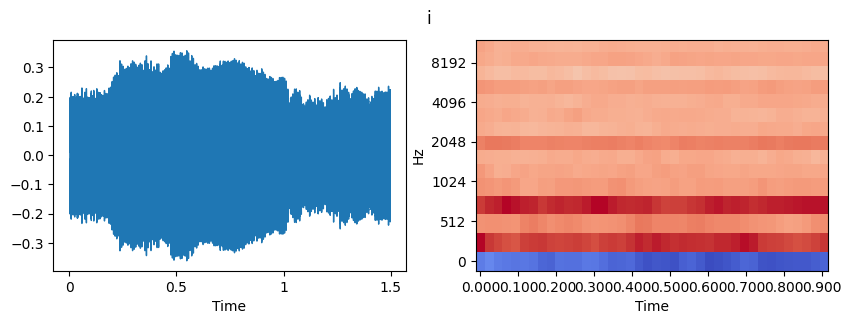

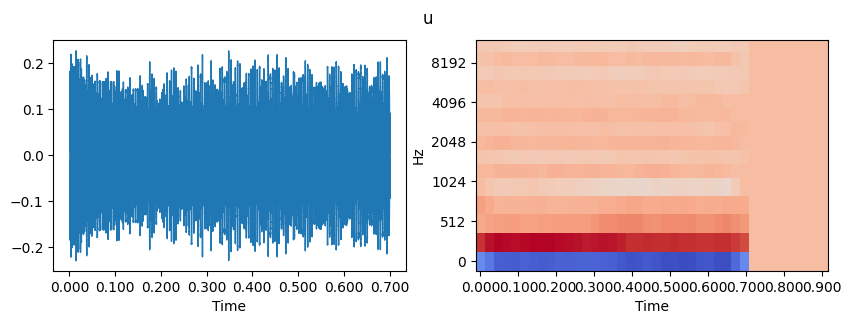

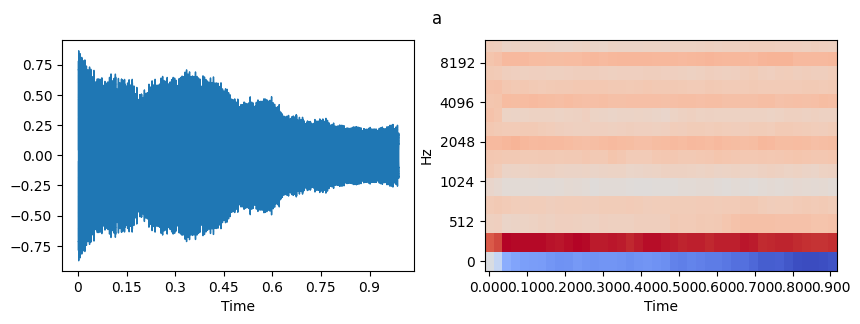

In [4]:
count = {}

for file in glob.glob('./raw_data/*.wav'):
    category = file.split('/')[-1].split('-')[-1].split('_')[0]
    if count.get(category) is None:
        plot_wave_and_mfcc(file, category)
        count[category] = 1

- no of features = 15
- time step = 40

In [5]:
def category_to_class(category):
    if category == 'a':
        return 0
    if category == 'i':
        return 1
    if category == 'u':
        return 2

In [6]:
X, y = [], []

for file in glob.glob('./raw_data/*.wav'):
    category = file.split('/')[-1].split('-')[-1].split('_')[0]
    x = extract_mfcc(file)
    
    X.append(x)
    y.append(category_to_class(category))

In [7]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((1584, 15, 40), (1584,))

In [8]:
np.save('./extracted_features/X.npy', X)
np.save('./extracted_features/y.npy', y)